In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Libraries

In [2]:
import numpy as np
import pandas as pd


from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time


import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/frequency_domain_dataset.csv')
dataset.head()

,type,flight_month,num_of_stops,distance_bet_2_countries,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,source_Bangalore,source_Chennai,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,19.968211,7.842447,9.777685,6.693818,9.465099,3.965368,1.487280,-0.086574,-1.501364,-3.821897,...,-3.160457,-5.830541,3.707683,-3.867594,-4.518252,-0.288530,1.915137,1.882360,-3.178305,1.119284
1,17.510445,6.419320,6.677994,3.564471,6.693263,4.464265,0.619970,-6.108903,1.217657,-5.809043,...,-6.531786,-7.816626,-1.660414,-1.485547,2.186751,-4.438519,-1.650583,2.540510,-0.352123,1.375775
2,16.903724,5.207838,7.558978,2.965944,1.080366,0.267824,0.543752,8.579035,-1.917324,4.677328,...,-4.363496,2.468883,-2.958966,-1.343517,-0.955892,-1.718943,-4.187633,-0.753669,0.754359,-2.331051
3,16.516803,5.201872,7.010380,1.540628,3.128070,-0.657111,1.144713,5.481897,5.831180,-2.220292,...,1.917251,-4.409183,0.250570,-1.683729,0.765173,-3.114361,-4.230475,2.286713,-1.533440,-1.184566
4,15.306994,3.692035,3.021959,2.210024,3.120611,4.462617,-2.292387,1.265322,3.253380,2.415397,...,-8.760034,-0.846744,-0.817190,-5.142069,-4.751727,-0.734447,-4.192973,-1.612260,-8.378640,-0.295927


In [4]:
labels = pd.read_csv('/content/drive/MyDrive/one_hot_encoded_dataset.csv')

# **Spliting the Dataset**

In [5]:
dataset.shape

(240197, 32)

In [6]:
y_train = labels['formatted_price'][:192167]
y_test = labels['formatted_price'][192167:]



x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [7]:
def compare_orgin_predict(y_test,y_pred,N=40):
    x_ax = range(len(y_test[:N]))
    plt.plot(x_ax, y_test[:N], label="original")
    plt.plot(x_ax, y_pred[:N], label="predicted")
    plt.title("Flight Price test and predicted data")
    plt.xlabel('Observation Number')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# **Modeling**

In [8]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[15:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time: 34.159536296
Training Score: 0.8877252602419553
Test Score: 0.9087986373507355
r2_score: 0.9087986373507355
MSE: 46946950.91617765
RMSE: 6851.78450596468
MAE: 5030.970358528417
----------------------------------------


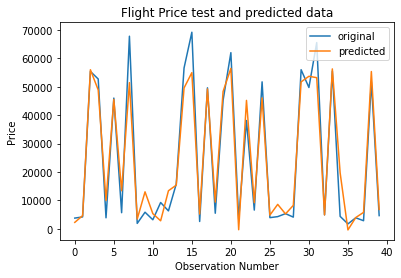

----------------------------------------
Using model: PR
Time: 9.635520496999995
Training Score: 0.9296331041826846
Test Score: 0.9477641707056728
r2_score: 0.9401374236126318
MSE: 30814950.059261806
RMSE: 5551.121513645851
MAE: 3671.5252526269196
----------------------------------------


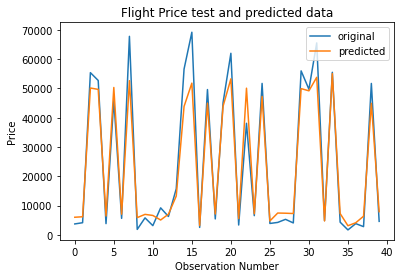

----------------------------------------
Using model: HGBR
Time: 10.011185841999996
Training Score: 0.939021316789904
Test Score: 0.9517500477849615
r2_score: 0.9517500477849615
MSE: 24837218.135200676
RMSE: 4983.695228964215
MAE: 3265.5168014852156
----------------------------------------


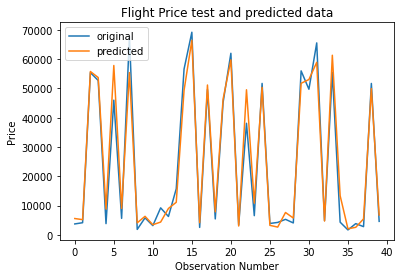

----------------------------------------
Using model: LGBMR
Time: 6.524733501
Training Score: 0.9394674709356329
Test Score: 0.9524675986036619
r2_score: 0.9524675986036619
MSE: 24467850.594115376
RMSE: 4946.498821804709
MAE: 3238.4209247854933
----------------------------------------


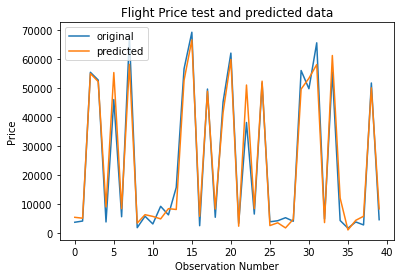

----------------------------------------
Using model: LR
Time: 0.501916860999998
Training Score: 0.9038625063023425
Test Score: 0.9210706402311397
r2_score: 0.9210706402311397
MSE: 40629796.21438684
RMSE: 6374.15062689821
MAE: 4243.0658546741615
----------------------------------------


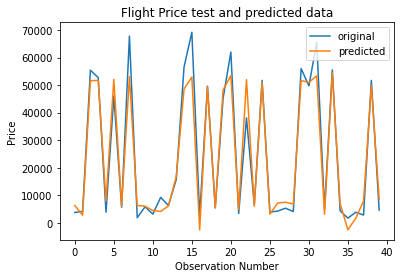

----------------------------------------
Using model: GBR
Time: 149.987275856
Training Score: 0.8877396389514516
Test Score: 0.9088001732521296
r2_score: 0.9088001732521296
MSE: 46946160.293260776
RMSE: 6851.726811049954
MAE: 5031.369594687014
----------------------------------------


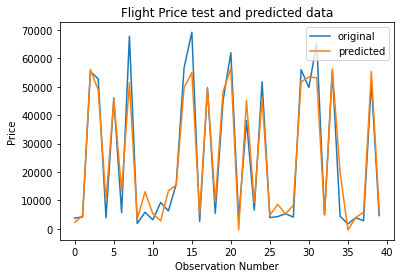

----------------------------------------
Using model: ETR
Time: 141.28828818300002
Training Score: 0.9619845843983686
Test Score: 0.9677944101790836
r2_score: 0.9677944101790836
MSE: 16578197.963594848
RMSE: 4071.6333287263046
MAE: 2108.3180765327616
----------------------------------------


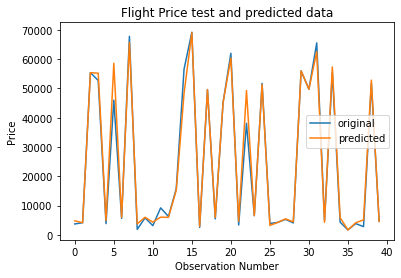

----------------------------------------
Using model: BR
Time: 49.86570020399995
Training Score: 0.961044518936553
Test Score: 0.9660976533504715
r2_score: 0.9660976533504715
MSE: 17451623.066417944
RMSE: 4177.5139815945495
MAE: 2139.2322754246516
----------------------------------------


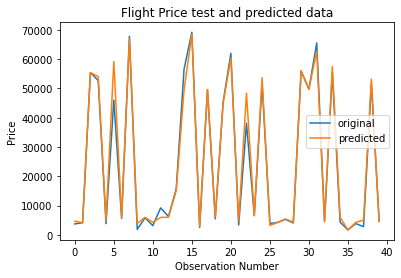

----------------------------------------
Using model: DT
Time: 6.7148157689999834
Training Score: 0.9619845843983685
Test Score: 0.962966338187886
r2_score: 0.962966338187886
MSE: 19063503.57972048
RMSE: 4366.177227245875
MAE: 2131.145384758817
----------------------------------------


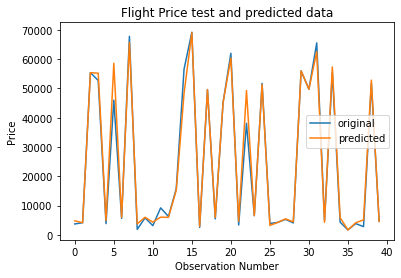

----------------------------------------
Using model: RF
Time: 491.09117563800004
Training Score: 0.9616434898802654
Test Score: 0.9668048217568507
r2_score: 0.9668048217568507
MSE: 17087599.991549775
RMSE: 4133.715035116689
MAE: 2130.9275157470283
----------------------------------------


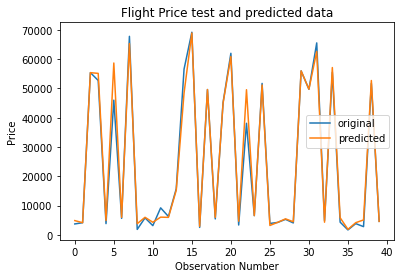

----------------------------------------


In [9]:
for name, model in models.items():
    
    start = time.process_time()
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Time: {time.process_time() - start}')

    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)


